<font face="XB Zar" size=5><div dir=rtl>
# بخش اول: کتابخانه‌های مورد نیاز و مرور دانش پایه‌ای 

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

<font face="XB Zar" size=5><div dir=rtl>
در این بخش میخواهیم اهمیت و کاربردی برخی از نمودارها را مرور کنیم. در سلول زیر ۴ نوع نمودار مختلف به همراه قطعه کد آنها فراهم شده است.

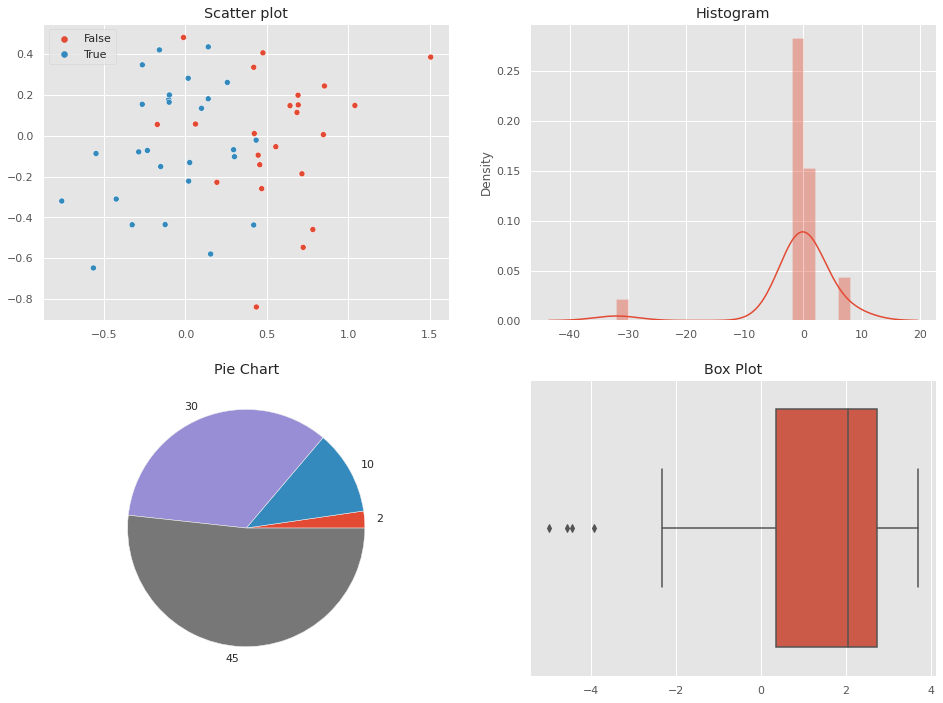

In [3]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

r1 = np.random.randn(50)/3
r2 = np.random.randn(50)/3
scatter_hue = np.random.choice([True, False], size=50)
r1 += np.ones(50) * ~scatter_hue * 0.5
axes[0][0].set_title('Scatter plot')
sns.scatterplot(x=r1, y=r2, hue=scatter_hue, ax=axes[0][0])

dist_smaples = list(np.random.normal(loc=0.0, scale=1, size=20)) + [8,8,-32]
axes[0][1].set_title('Histogram')
sns.distplot(dist_smaples, bins=20, hist=True, ax=axes[0][1])

pie_values = [10, 30, 2, 45]
axes[1][0].set_title('Pie Chart')
axes[1][0].pie(sorted(pie_values), labels=sorted(pie_values))

box_values = np.concatenate((2 + np.random.randn(20), -5 + 2 * np.random.randn(5)))
axes[1][1].set_title('Box Plot')
sns.boxplot(box_values, ax=axes[1][1]);

<font face="XB Zar" size=5><div dir=rtl>
 نمودار scatter plot: مناسب برای نمایش مقدارهای عددی و متغیرهای کمی همچنین با آن میتوان رابطه و همبستگی بین متغیر ها را درک کرد 
<br>
نمودار histogram:تخمین مناسبی از توزیع داده ها و پراکندگی آن ها به ما میدهد. مناسب برای داده هایی کمی و تقریبا پیوسته همچنین برای مقایسه فراوانی دو بازه از داده ها   
<br>
نمودار pie chart: وقتی داده ها را بر اساس یکی یا چند ویژگی دسته بندی میکنیم برای مقایسه درصد دسته ها مناسب است در واقع به ما این امکان را میدهد که چگونگی تقسیم بندی یه کل به بخش های مختلف را بهتر درک کن. مناسب داده های گسسته است. 
<br><br>
نمودار box plot: برای نمایش داده ها بر اساس شاخص های پراندگی مثل میانه، ماکسیمم، مینممم و چارک ها مناسب است در واقع با آن میتوان درک کرد که داده ها کجا ها  بیشتر متمرکز شده اند. با آن میتوان درک بهتری از داده های پرت و تقارن داده ها داشت. برای داده های کمی مناسب است 
</div>

<font face="XB Zar" size=5><div dir=rtl>
# بخش دوم: لود کردن دیتاست و پاکسازی داده‌ها
<br>
در این بخش هدف ما رسیدن به شناخت سطحی و ابتدایی از دیتاست است. برای اینکار دیتاست را لود کرده و چند سطر ابتدایی آن را نمایش می‌دهیم.

In [4]:
# Load dataset
df = pd.read_csv('dataset.csv')
df.head(5)

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1.0,12.0
1,1,yes,0,33.25000,2.4200,0.005217,9.854167,no,NaN,3,34,1.0,13.0
2,2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1.0,5.0
3,3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1.0,7.0
4,4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1.0,5.0


<font face="XB Zar" size=5><div dir=rtl>
این دیتاست حاوی اطلاعات مرتبط با کارت‌های بانکی مربوط اشخاص مختلف است.
<br>
توضیح هر ستون دیتاست:<br>
<ul style="font-size: 20px" dir=rtl>
<li>reports: تعداد تخلفات فرد در تراکنشات بانکی خود</li>
<li>age: سن فرد</li>
<li>income: درامد سالانه فرد که بر ۱۰۰۰۰ تقسیم شده است.</li>
<li>expenditure: متوسط مخارج ماهانه</li>
<li>share: نسبت مخارج ماهانه به درامد سالانه</li>
<li>owner: وضعیت اسکان. صاحب خانه یا مستاجر</li>
<li>selfimpl: کارمند یا شغل آزاد</li>
<li>dependents: تعداد افراد وابسته</li>
<li>Month: تعداد ماه‌هایی که در آدرس کنونی زندگی میکند.</li>
<li>majorcards: تعداد کارت‌های اصلی فرد</li>
<li>active: تعداد کارت‌های بانکی فعلا فرد</li>


<font face="XB Zar" size=5><div dir=rtl>
ستون‌های اضافی که استفاده نمی‌شوند (یعنی ستون 
card و ستون Unnamed)
را پاک می‌کنیم و 
به ازای هر ستون عددی اطلاعات آماری آن را از جمله کمینه، بیشینه، میانگین، واریانس و میانه سپس به ازای ستون های‌ اسمی، تعداد مقادیر یکتا و همینطور تعداد تکرار هر مقدار یکتا را به دست می‌آوریم.
( مثلا ستون x از دو مقدار یکتای yes و no .تشکیل شده است که به ترتیب ۳۰۰ و ۴۰۰ بار تکرار شده اند)
</div>

In [5]:
df.dtypes

Unnamed: 0       int64
card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards     float64
active         float64
dtype: object

<font face="XB Zar" size=5><div dir=rtl>
داده های از نوع آبجکت اسمی اند و بقیه عددی


In [6]:
#remove Unnamed and card column
df.drop(['Unnamed: 0', 'card'], axis=1, inplace=True)
df.head(5)

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1.0,12.0
1,0,33.25000,2.4200,0.005217,9.854167,no,NaN,3,34,1.0,13.0
2,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1.0,5.0
3,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1.0,7.0
4,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1.0,5.0


In [7]:
# Show statistical info for numeric columns
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1296.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1272.000000,1315.000000
mean,0.456406,33.263632,3.365376,0.066309,181.046615,0.993935,55.267627,0.818396,6.752852
std,1.345267,10.171424,1.693902,0.107471,280.937245,1.247745,66.271746,0.385669,6.377321
min,0.000000,0.166667,0.210000,-1.000000,-953.565255,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,25.416670,2.243750,0.002072,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.291665,2.900000,0.038755,101.200800,1.000000,30.000000,1.000000,5.000000
75%,0.000000,39.416670,4.000000,0.093548,248.812500,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [8]:
# Show statistical info for categorical columns
non_numeric_df = df.select_dtypes(include=['object'])
print(non_numeric_df.nunique())
non_numeric_df.apply(lambda x: x.value_counts())




owner      4
selfemp    3
dtype: int64


,owner,selfemp
0,14.0,NaN
1,7.0,NaN
no,723.0,1210.0
no-info,NaN,11.0
yes,574.0,87.0


In [9]:
print(non_numeric_df['owner'].value_counts())
print()
print(non_numeric_df['selfemp'].value_counts())

no     723
yes    574
0       14
1        7
Name: owner, dtype: int64

no         1210
yes          87
no-info      11
Name: selfemp, dtype: int64


In [10]:
# Calc missing fields count for each col
df.isnull().sum() * 100 / len(df)

reports        0.000000
age            1.743745
income         0.000000
share          0.000000
expenditure    0.000000
owner          0.075815
selfemp        0.833965
dependents     0.000000
months         0.000000
majorcards     3.563306
active         0.303260
dtype: float64

<font face="XB Zar" size=5><div dir=rtl>
وجود داده‌ی outlier را نیز در ستون‌های عددی  به کمک boxplot بررسی می‌کنیم و برای outlier بودن یا نبودن داده‌ها در نهایت تصمیم میگیریم.
</div>

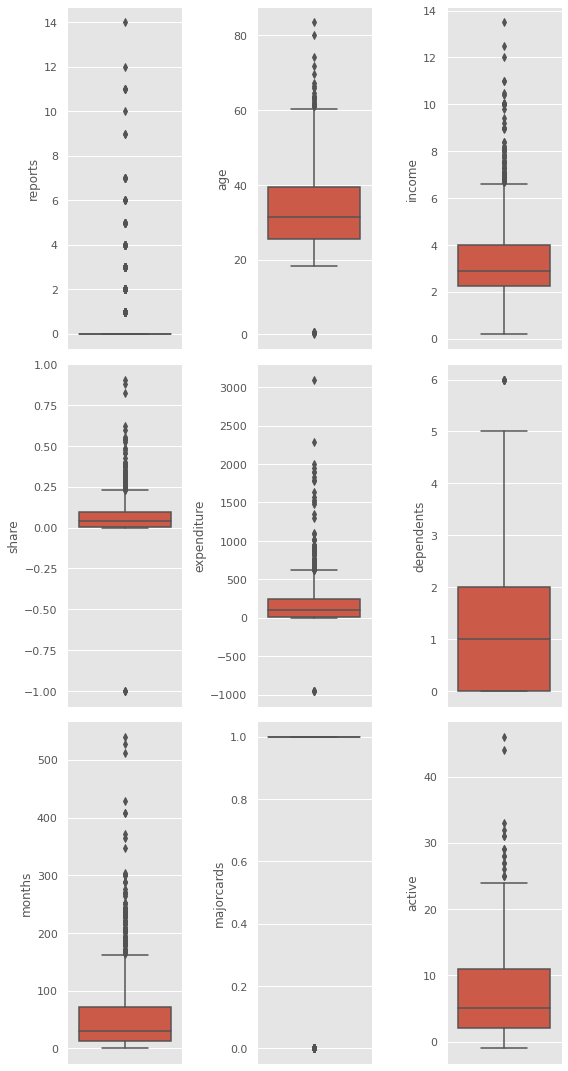

In [11]:
numeric_df = df.select_dtypes(exclude=['object'])
fig, axes = plt.subplots(3, 3,figsize=(8,15))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y= numeric_df.iloc[:, i],  orient='v' , ax=ax)
fig.tight_layout()

<font face="XB Zar" size=5><div dir=rtl>
در برخی از ستون‌های اسمی عباراتی وجود دارند که معادل ناموجود بودن مقدار آن ردیف در ان ستون هستند. همچنین ستون‌های اسمی باینری نیز بهتر است به حالت True, False در بیایند.
برای ستون‌های عددی نیز برخی مقادیر غیر مجاز یا ناموجود هستند(یعنی برای ستون‌هایی که باید مقدار مثبت داشته باشند، مقدار منفی ثبت شده است و یا داده‌ای بسیار بزرگ به عبارتی outlier وجود دارد) که باید به صورت None در بیایند.
این ستون‌ها را تغییر می‌دهیم و دوباره نسبت مقادیر ناموجود هر ستون و همینطور اطلاعات آماری ستون های عددی تغییر یافته را محاسبه می‌کنیم.
</div>

In [12]:

# from scipy import stats
# numeric_df[np.abs(stats.zscore(numeric_df)) >3 ] = np.nan

# df.select_dtypes(include=['object']) = non_numeric_df
# df.select_dtypes(exclude=['object']) = numeric_df

In [13]:
non_numeric_df.replace(['no', 'yes', 0, 1, 'no-info'],[False, True, np.nan, np.nan, np.nan], inplace = True)

numeric_df[numeric_df<0] = np.nan
# Q1 = numeric_df.quantile(0.25)
# Q3 = numeric_df.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
# numeric_df[(numeric_df < (Q1 - 20 * IQR)) |(numeric_df > (Q3 + 20 * IQR))] = np.nan

df = pd.concat([non_numeric_df, numeric_df], axis=1, join='inner')

In [14]:
# Calc missing fields
df.isnull().sum() * 100 / len(df)

owner          0.075815
selfemp        1.667930
reports        0.000000
age            1.743745
income         0.000000
share          0.227445
expenditure    0.379075
dependents     0.000000
months         0.000000
majorcards     3.563306
active         3.866566
dtype: float64

In [15]:
# Show numeric cols' statistical info
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1296.000000,1319.000000,1316.000000,1314.000000,1319.000000,1319.000000,1272.000000,1268.000000
mean,0.456406,33.263632,3.365376,0.068739,185.364012,0.993935,55.267627,0.818396,7.040221
std,1.345267,10.171424,1.693902,0.094744,272.590051,1.247745,66.271746,0.385669,6.313998
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002208,4.817708,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.291665,2.900000,0.038811,101.396250,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093615,249.100800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


<font face="XB Zar" size=5><div dir=rtl>
گاهی ستون‌های مختلف دیتاست از منابع جداگانه‌ای استخراج می‌شوند که در هر یک می‌توانند باعث ناموجود شدن فیلدهای برخی ستون‌ها بشوند.
به همین دلیل تشخیص ارتباط ستون‌ها در ناموجود بودن 
فیلد‌هایشان می‌تواند به تشخیص و حذف دسته‌های معیوب داده‌ها کمک کند.
<br>
با استفاده از نمودار heatmap  ارتباط ستون‌ها را در نداشتن مقدار نشان می‌دهیم.
یعنی محتوای هر ستون را به صورت True 
(<b>
ناموجود</b>)
و False
(<b>موجود</b>)
در می‌آوریم و همبستگی ستون‌های حاصل را با heatmap نشان داده و مقایسه می‌کنیم.
</div>

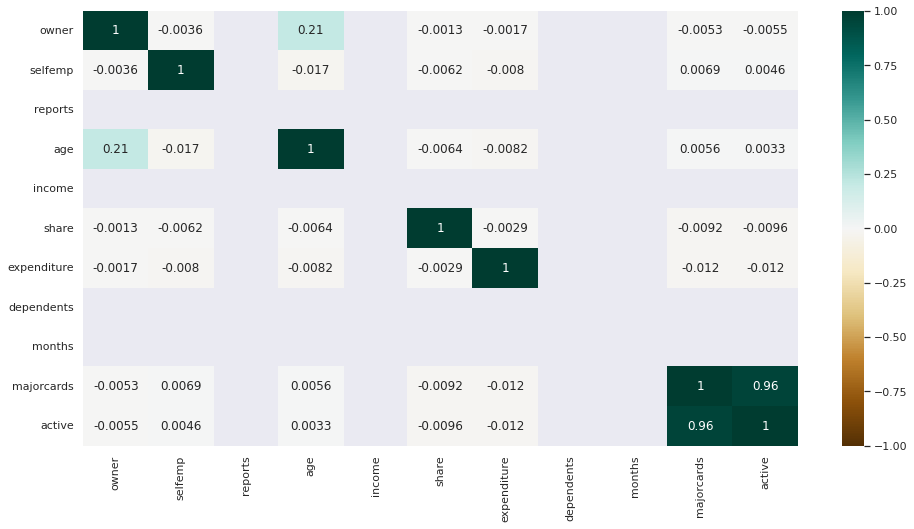

In [16]:
bf = df.isna()

# Plot heatmap for columns' missing values
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(bf.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG');


<font face="XB Zar" size=5><div dir=rtl>
دو روش برای حل مشکل مقادیر ناموجود در یک دیتاست، پر کردن آن‌ها با میانگین و میانه‌ی مقادیر هر ستون است.
<br>
بسته به شرایط هر کدام مزیت های مربوط به خود را دارد مثلا اگر میانگین را منتسب کنیم باعث میشود میانگین داده‌ها تغییری نکند که این نیز باعث می‌شود همبستگی بین
ستون های مختلف تغییری نکند از طرف دیگر برعکس مد، میانگین به داده‌های پرت حساس هست لذا در اینجا که ما داده‌های پرت زیاد داریم به نظربهتر هست از مد
استفاده کنیم.
</div>

In [17]:
# Manage missing values here.
# df.fillna(df.mean())
df.fillna(df.median())



,owner,selfemp,reports,age,income,share,expenditure,dependents,months,majorcards,active
0,True,False,0,37.66667,4.5200,0.033270,124.983300,3,54,1.0,12.0
1,False,0.0,0,33.25000,2.4200,0.005217,9.854167,3,34,1.0,13.0
2,True,False,0,33.66667,4.5000,0.004156,15.000000,4,58,1.0,5.0
3,False,False,0,30.50000,2.5400,0.065214,137.869200,0,25,1.0,7.0
4,True,False,0,32.16667,9.7867,0.067051,546.503300,2,64,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1314,True,False,0,33.58333,4.5660,0.002146,7.333333,0,94,1.0,19.0
1315,False,False,5,23.91667,3.1920,0.000376,0.000000,3,12,1.0,5.0
1316,True,False,0,40.58333,4.6000,0.026513,101.298300,2,1,1.0,2.0
1317,False,True,0,32.83333,3.7000,0.008999,26.996670,0,60,1.0,7.0


<font face="XB Zar" size=5><div dir=rtl>
# بخش سوم: تحلیل اکتشافی داده‌ها

<font face="XB Zar" size=5><div dir=rtl>
هدف ما در نهایت از تحلیل این دیتاست پیشبینی درامد فرد است. برای اینکار در ابتدا توزیع احتمال درآمد فرد را نمایش می‌دهیم.
</div>

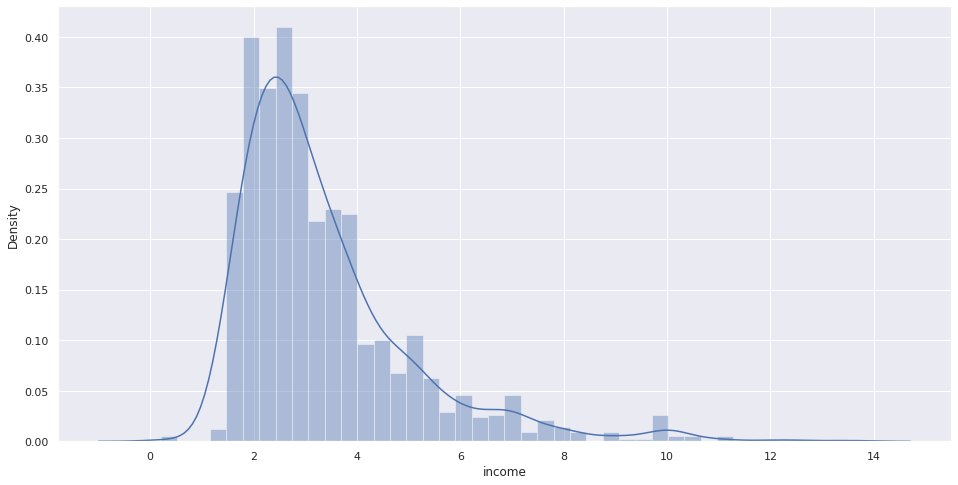

In [18]:
sns.distplot(df['income'],label='income * 1000', hist=True);

<font face="XB Zar" size=5><div dir=rtl>
حال توزیع احتمال درامد را به ازای وضعیت اقامت (صاحب خانه یا مستاجر) نمایش می‌دهیم.

</div>

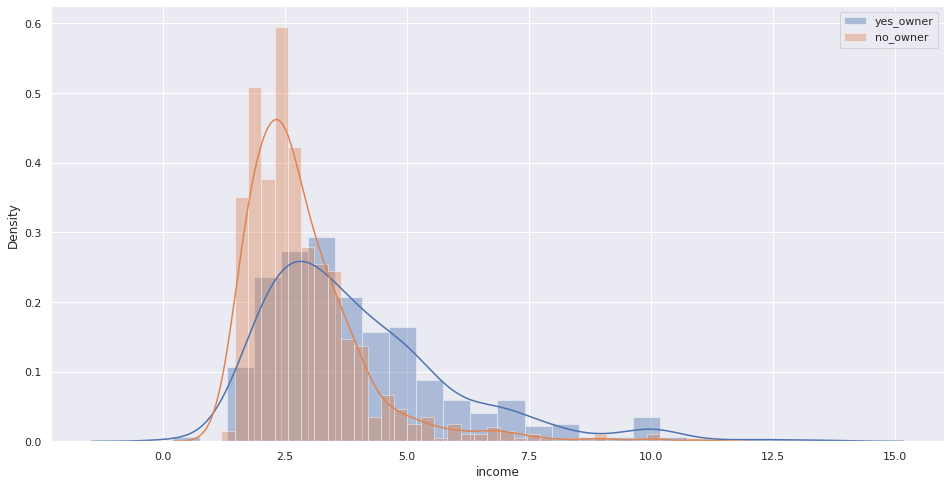

In [19]:
df[['income','owner']]

yes_owner = df[df['owner'] == True]['income']
no_owner = df[df['owner'] == False]['income']
sns.distplot(yes_owner, label='yes_owner', hist=True);
sns.distplot(no_owner, label='no_owner', hist=True);
plt.legend();

<font face="XB Zar" size=5><div dir=rtl>
توزیع سنی افراد را نشان می‌دهیم. سپس
افراد را به سه گروه جوان میان سال و کهنسال تقسیم کرده و بر اساس آن‌ها توزیع احتمال درامد را نمایش می‌دهیم.
سه بازه‌ی ۰ تا ۳۵ سال،  ۳۵تا ۵۵ سال و ۵۵ سال به بالا را به عنوان بازه‌های سنی جوان، میانسال و کهنسال در نظر می‌گریم و به ازای هر فرد مقدار سنش را به یکی از این سه دسته در قالب ستونی جدید مپ می‌کنیم. 
(مقادیر ستون جدید برای راحتی در تحلیل به صورت ۰ ۱ ۲ می‌باشد.)
</div>

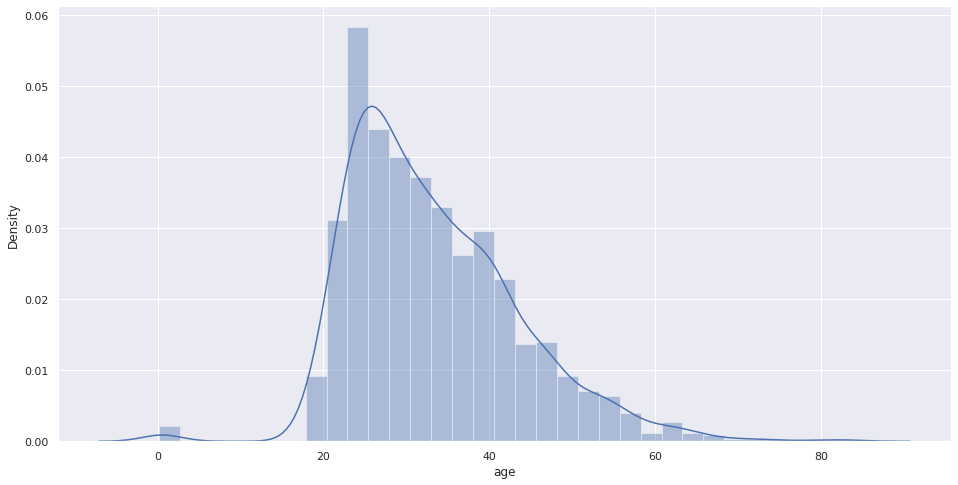

In [20]:
sns.distplot(df['age'],label='income * 1000', hist=True);

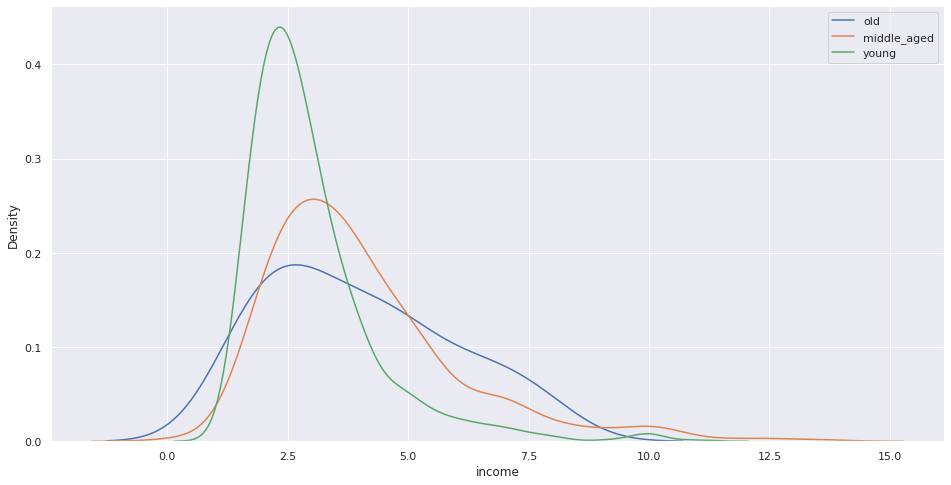

In [21]:
df['age_range'] = df['age'].apply(lambda x: 2 if x>55 else 1 if x>35 else 0)
old = df[df['age_range'] == 2]['income']
middle_aged = df[df['age_range'] == 1]['income']
young = df[df['age_range'] == 0]['income']


sns.distplot(old, label='old', hist=False);
sns.distplot(middle_aged, label='middle_aged', hist=False)
sns.distplot(young, label='young', hist=False);

plt.legend();

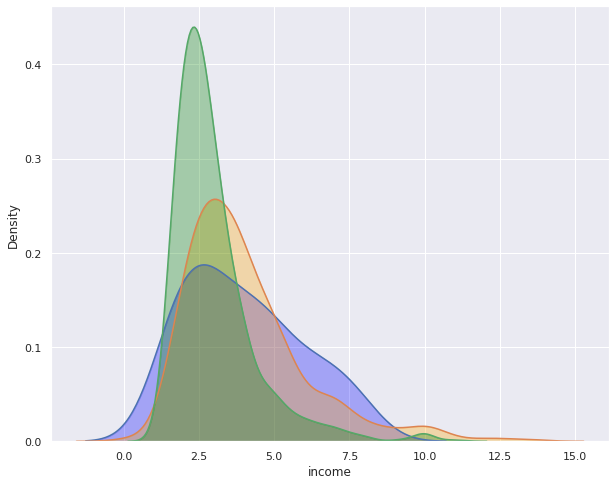

In [132]:
df['age_range'] = df['age'].apply(lambda x: 2 if x>55 else 1 if x>35 else 0)
old = df[df['age_range'] == 2]['income']
middle_aged = df[df['age_range'] == 1]['income']
young = df[df['age_range'] == 0]['income']


ax = sns.distplot(old, label='old', hist=False);
ax = sns.distplot(middle_aged, label='middle_aged', hist=False)
ax = sns.distplot(young, label='young', hist=False);
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]
l3 = ax.lines[2]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
x3 = l3.get_xydata()[:,0]
y3 = l3.get_xydata()[:,1]
ax.fill_between(x1,y1, color="blue", alpha=0.3)
ax.fill_between(x2,y2, color="orange", alpha=0.3)
ax.fill_between(x3,y3, color="green", alpha=0.3)



plt.show(block=False)

Pie Chart

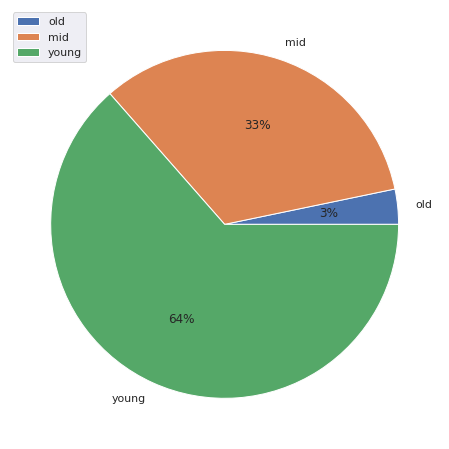

In [84]:
df['age_range'] = df['age'].apply(lambda x: 2 if x>55 else 1 if x>35 else 0)
old = df[df['age_range'] == 2]['income']
middle_aged = df[df['age_range'] == 1]['income']
young = df[df['age_range'] == 0]['income']

alls = len(df)
olds = len(old)
mids = len(middle_aged)
youngs = len(young)
data = [olds, mids, youngs]


plt.pie(data, labels=['old', 'mid', 'young'], autopct='%.0f%%')
plt.legend()

<font face="XB Zar" size=5><div dir=rtl>
رابطه‌ی درامد و تعداد تخلف را با نمودار مناسب نمایش می‌دهیم..
</div>

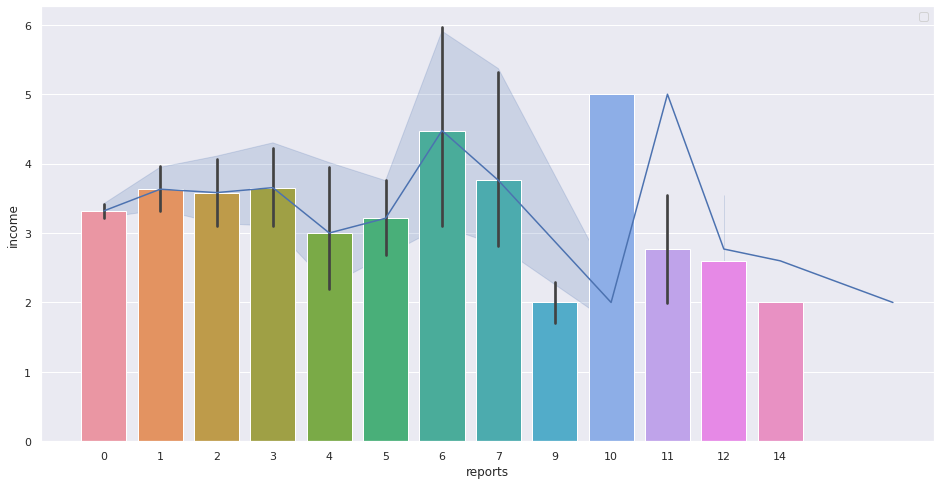

In [22]:
df
sns.barplot(data = df , y='income', x ='reports');
sns.lineplot(data = df , y='income', x ='reports');
plt.legend();


Bubble Plot

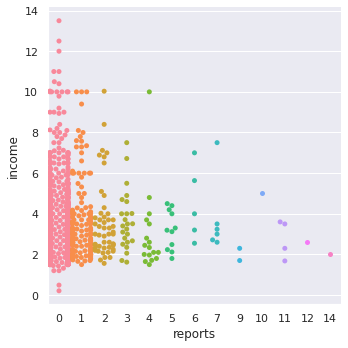

In [32]:
# minsize = 0
# maxsize = 5
# sns.catplot(x="reports", y="income", kind="swarm",sizes=(minsize*10, maxsize*10), data=df)
sns.catplot(x="reports", y="income", kind="swarm",data=df)

<font face="XB Zar" size=5><div dir=rtl>
نمودار heatmap را برای تمام ستون‌ها رسم می‌کنیم.
</div>

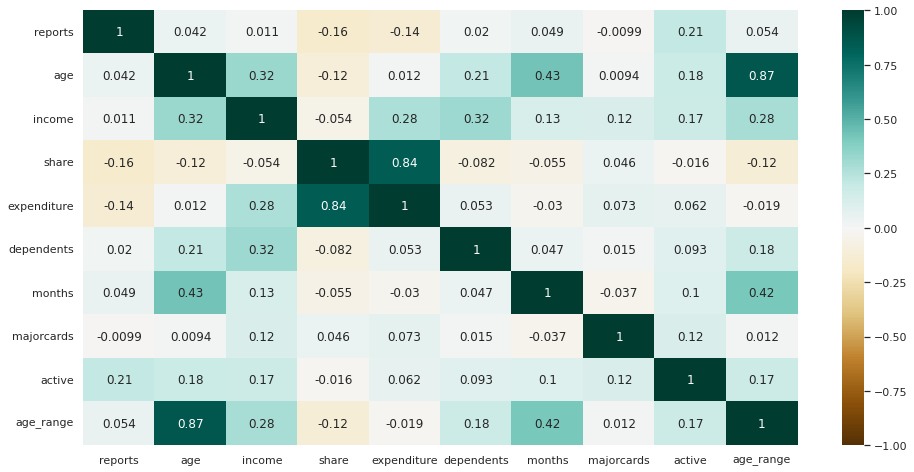

In [23]:
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG');



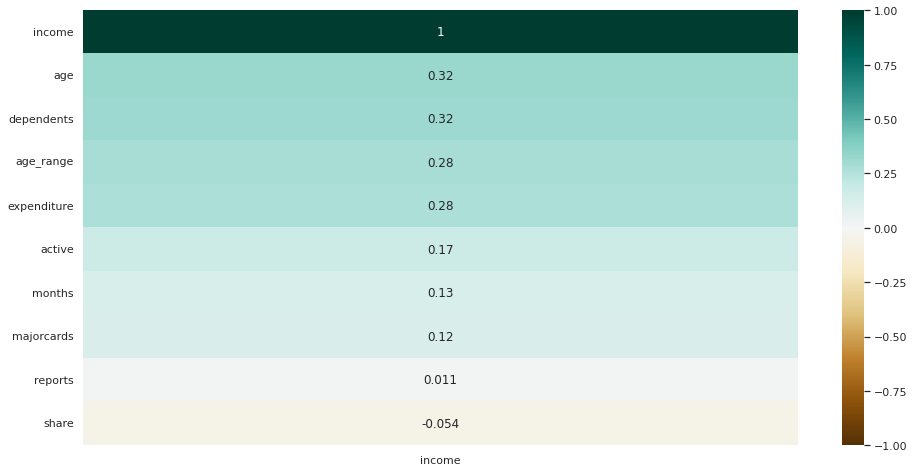

In [24]:
sns.heatmap(df.corr()[['income']].sort_values(by='income', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<font face="XB Zar" size=5><div dir=rtl>
به نظر دو ستون share و dependents بیشترین همبستگی را با income دارند.
</div>

<font face="XB Zar" size=5><div dir=rtl>
با استفاده از میانگین درامد افراد را در ستونی با نام wealth به دو گروه فقیر و ثروتمند تقسیم می‌کنیم
(بالای میانگین گروه ثروتمند و پایین یا مساوی میانگین گروه فقیر)
و
درصد افراد ثروتمند و فقیر را در یک نمودار با نمایش درصد هر گروه نشان می‌دهیم.
</div>

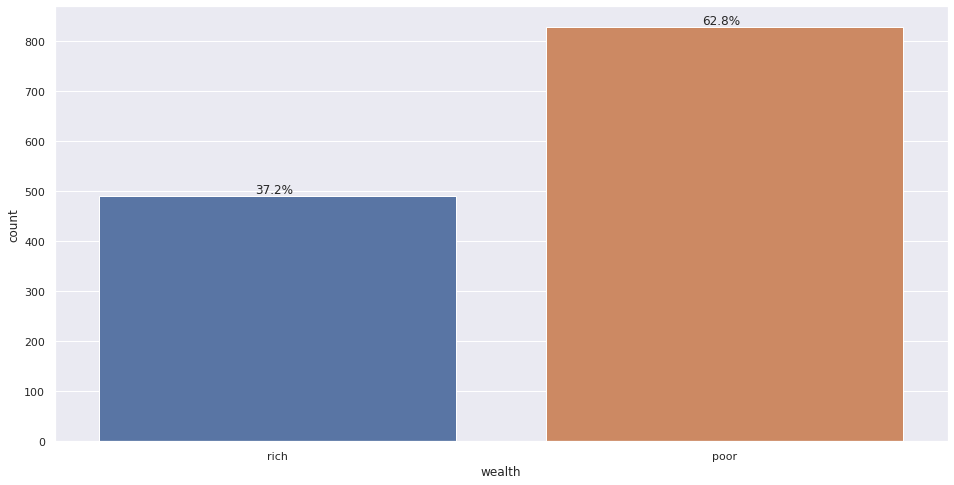

In [25]:
m = df['income'].mean()
df['wealth'] = df['income'].apply(lambda x:'rich' if x>m else 'poor')


ax = sns.countplot(x="wealth", data=df)

total = len(df['wealth'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()+5
        ax.annotate(percentage, (x, y), size = 12)

plt.show()

<font face="XB Zar" size=5><div dir=rtl>
توزیع مخارج را به ازای افراد ثروتمند و فقیر مقایسه می‌کنیم.
</div>

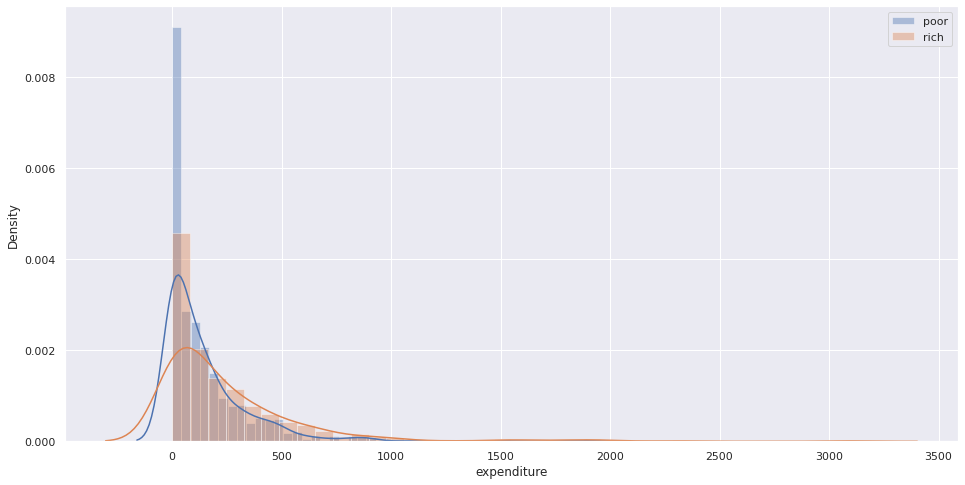

In [26]:
df[['expenditure','wealth']]

poor = df[df['wealth'] == 'poor']['expenditure']
rich = df[df['wealth'] == 'rich']['expenditure']

sns.distplot(poor, label='poor', hist=True);
sns.distplot(rich, label='rich', hist=True);
plt.legend();


# sns.countplot(x='Sex',hue='Risk',data=p[1])

<font face="XB Zar" size=5><div dir=rtl>
با دسته بندی ستون expenditure با استفاده از percentile های ۱۰ تایی رابطه‌ی معنادار تری بین آن ستون و ستون ثروت برقرار می‌شود نمودار زیر به ما میگوید تقریبا در میان ثروتمندان پولدارترها پرخرج‌تر هستند اما در میان فقرا پولدارهایشان کمخرج‌ترند.
</div>

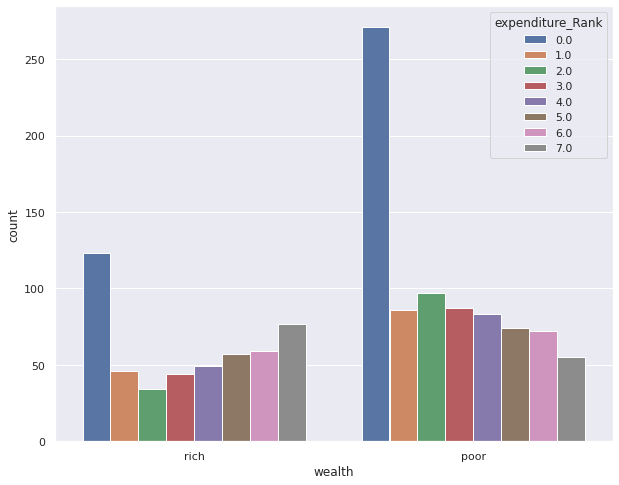

In [27]:
df['expenditure_Rank']= pd.qcut(df['expenditure'], q = 10, labels = False, duplicates = 'drop')
# df['expenditure_Rank'].value_counts()
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data=df, x='wealth', hue='expenditure_Rank');

<font face="XB Zar" size=5><div dir=rtl>
تمام داده‌های اسمی را به داده‌های عددی تبدیل می‌کنیم.

In [28]:
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df.head()

,owner,selfemp,reports,age,income,share,expenditure,dependents,months,majorcards,active,age_range,wealth,expenditure_Rank
0,1,0,0,37.66667,4.5200,0.033270,124.983300,3,54,1.0,12.0,1,1,3.0
1,0,-1,0,33.25000,2.4200,0.005217,9.854167,3,34,1.0,13.0,0,0,0.0
2,1,0,0,33.66667,4.5000,0.004156,15.000000,4,58,1.0,5.0,0,1,0.0
3,0,0,0,30.50000,2.5400,0.065214,137.869200,0,25,1.0,7.0,0,0,3.0
4,1,0,0,32.16667,9.7867,0.067051,546.503300,2,64,1.0,5.0,0,1,7.0
